In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/train.csv")
df.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,,Low,2018,No,4937,No
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,3,West Bengal,62,,High,2013,NaN,8610,Yes
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,No


In [ ]:
df.isnull().sum()

ID                     0
STATE                  0
AGE                    0
OCCUPATION             0
INCOME_GROUP           0
CUSTOMER_SINCE         0
LOYALTY_PROGRAM    17824
PAST_PURCHASE          0
PURCHASE               0
dtype: int64

In [ ]:
3437/150000

0.022913333333333334

In [ ]:
df.shape

(150000, 9)

In [ ]:
df.dtypes

ID                  int64
STATE              object
AGE                 int64
OCCUPATION         object
INCOME_GROUP       object
CUSTOMER_SINCE      int64
LOYALTY_PROGRAM    object
PAST_PURCHASE       int64
PURCHASE           object
dtype: object

In [ ]:
def get_(col):
    return (df[col].values == ' ').sum()

In [ ]:
for col in df.columns:
  if df[col].dtype=="object":
    print(col,get_(col))

STATE 1842
OCCUPATION 42777
INCOME_GROUP 3437
LOYALTY_PROGRAM 0
PURCHASE 0


In [ ]:
pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 3.9MB/s 


In [ ]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
encoder= ce.OrdinalEncoder(cols=['PURCHASE'],return_df=True,
                           mapping=[{'col':'PURCHASE',
'mapping':{'No':0,'Yes':1}}])

In [ ]:
df["PURCHASE"] = encoder.fit_transform(df["PURCHASE"])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
df.head(4)

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,,Low,2018,No,4937,0
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,0
2,3,West Bengal,62,,High,2013,NaN,8610,1
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,1


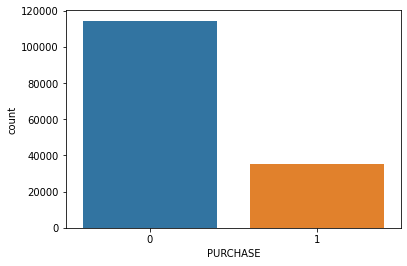

In [ ]:
sns.countplot(data = df, x = 'PURCHASE')

In [ ]:
df['PURCHASE'].value_counts()/df.shape[0]

0    0.76358
1    0.23642
Name: PURCHASE, dtype: float64

In [ ]:
df['CUSTOMER_SINCE'].max()

2019

Min=2008
Max=2019

In [ ]:
df['CUSTOMER_SINCE'] = df['CUSTOMER_SINCE'] - df['CUSTOMER_SINCE'].min()
df.head(4)

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,,Low,10,No,4937,0
1,2,Madhya Pradesh,27,Salaried,Low,10,No,10834,0
2,3,West Bengal,62,,High,5,NaN,8610,1
3,4,Tamil Nadu,27,Salaried,Low,10,No,14374,1


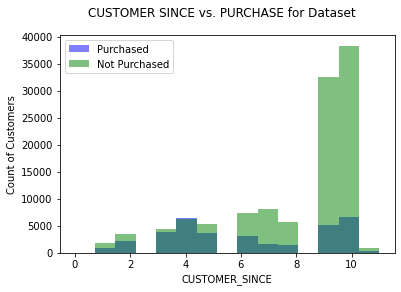

In [ ]:
fig, ax = plt.subplots()

ax.hist(df[df["PURCHASE"]==1]["CUSTOMER_SINCE"], bins=15, alpha=0.5, color="blue", label="Purchased")
ax.hist(df[df["PURCHASE"]==0]["CUSTOMER_SINCE"], bins=15, alpha=0.5, color="green", label="Not Purchased")

ax.set_xlabel("CUSTOMER_SINCE")
ax.set_ylabel("Count of Customers")

fig.suptitle("CUSTOMER SINCE vs. PURCHASE for Dataset")

ax.legend()

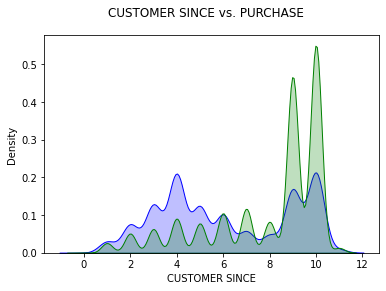

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["PURCHASE"]==1]["CUSTOMER_SINCE"], shade=True, color="blue", label="PURCHASED", ax=ax)
sns.kdeplot(df[df["PURCHASE"]==0]["CUSTOMER_SINCE"], shade=True, color="green", label="Not PURCHASED", ax=ax)

ax.set_xlabel("CUSTOMER SINCE")
ax.set_ylabel("Density")

fig.suptitle("CUSTOMER SINCE vs. PURCHASE");

Text(0.5, 0.98, 'PAST PURCHASE vs. PURCHASE')

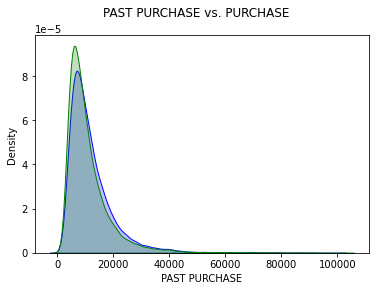

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["PURCHASE"]==1]["PAST_PURCHASE"], shade=True, color="blue", label="PURCHASED", ax=ax)
sns.kdeplot(df[df["PURCHASE"]==0]["PAST_PURCHASE"], shade=True, color="green", label="Not PURCHASED", ax=ax)

ax.set_xlabel("PAST PURCHASE")
ax.set_ylabel("Density")

fig.suptitle("PAST PURCHASE vs. PURCHASE")

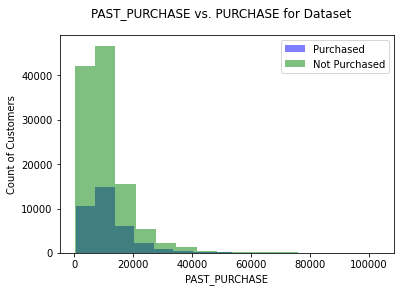

In [ ]:
fig, ax = plt.subplots()

ax.hist(df[df["PURCHASE"]==1]["PAST_PURCHASE"], bins=15, alpha=0.5, color="blue", label="Purchased")
ax.hist(df[df["PURCHASE"]==0]["PAST_PURCHASE"], bins=15, alpha=0.5, color="green", label="Not Purchased")

ax.set_xlabel("PAST_PURCHASE")
ax.set_ylabel("Count of Customers")

fig.suptitle("PAST_PURCHASE vs. PURCHASE for Dataset")

ax.legend()

In [ ]:
df['LOYALTY_PROGRAM'].fillna("NA", inplace=True)
encoder_loyaltyprogram= ce.OrdinalEncoder(cols=['LOYALTY_PROGRAM'],return_df=True,
                           mapping=[{'col':'LOYALTY_PROGRAM',
'mapping':{'NA':3,'No':1,'Yes':2}}])
df["LOYALTY_PROGRAM"] = encoder_loyaltyprogram.fit_transform(df["LOYALTY_PROGRAM"])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


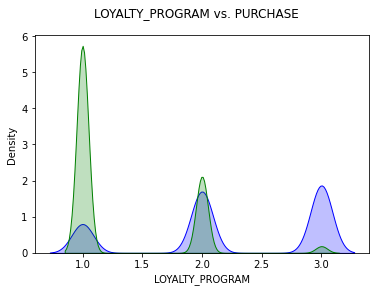

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["PURCHASE"]==1]["LOYALTY_PROGRAM"], shade=True, color="blue", label="PURCHASED", ax=ax)
sns.kdeplot(df[df["PURCHASE"]==0]["LOYALTY_PROGRAM"], shade=True, color="green", label="NOT PURCHASED", ax=ax)

ax.set_xlabel("LOYALTY_PROGRAM")
ax.set_ylabel("Density")

fig.suptitle("LOYALTY_PROGRAM vs. PURCHASE");

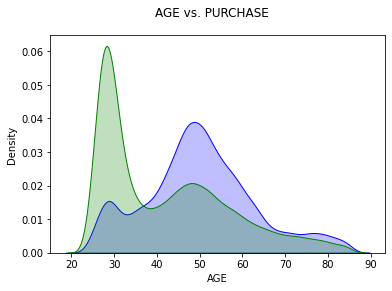

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["PURCHASE"]==1]["AGE"], shade=True, color="blue", label="PURCHASED", ax=ax)
sns.kdeplot(df[df["PURCHASE"]==0]["AGE"], shade=True, color="green", label="NOT PURCHASED", ax=ax)

ax.set_xlabel("AGE")
ax.set_ylabel("Density")

fig.suptitle("AGE vs. PURCHASE");

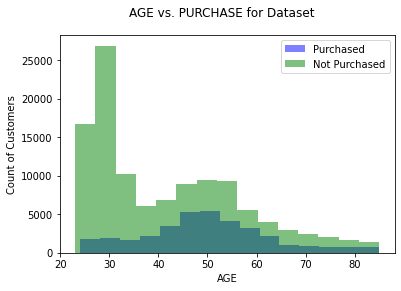

In [ ]:
fig, ax = plt.subplots()

ax.hist(df[df["PURCHASE"]==1]["AGE"], bins=15, alpha=0.5, color="blue", label="Purchased")
ax.hist(df[df["PURCHASE"]==0]["AGE"], bins=15, alpha=0.5, color="green", label="Not Purchased")

ax.set_xlabel("AGE")
ax.set_ylabel("Count of Customers")

fig.suptitle("AGE vs. PURCHASE for Dataset")

ax.legend()

In [ ]:
df['income'] = df['INCOME_GROUP'].apply(lambda x: x.replace(" ","NA"))
"""
encoder_inc= ce.OrdinalEncoder(cols=['INCOME_GROUP'],return_df=True,
                           mapping=[{'col':'INCOME_GROUP',
'mapping':{'NA':2,'Low':1,'Medium':3,'High':4}}])
df["income"] = encoder_inc.fit_transform(df["income"])
"""

'\nencoder_inc= ce.OrdinalEncoder(cols=[\'INCOME_GROUP\'],return_df=True,\n                           mapping=[{\'col\':\'INCOME_GROUP\',\n\'mapping\':{\'NA\':2,\'Low\':1,\'Medium\':3,\'High\':4}}])\ndf["income"] = encoder_inc.fit_transform(df["income"])\n'

In [ ]:
df.head(4)

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE,income
0,1,Uttar Pradesh,28,,Low,10,1,4937,0,Low
1,2,Madhya Pradesh,27,Salaried,Low,10,1,10834,0,Low
2,3,West Bengal,62,,High,5,3,8610,1,High
3,4,Tamil Nadu,27,Salaried,Low,10,1,14374,1,Low


In [ ]:
df["income"].value_counts()

Low       63523
High      41808
Medium    41232
NA         3437
Name: income, dtype: int64

In [ ]:
encoder_inc= ce.OrdinalEncoder(cols=['income'],return_df=True,
                           mapping=[{'col':'income',
'mapping':{'NA':2,'Low':1,'Medium':3,'High':4}}])
df["income"] = encoder_inc.fit_transform(df["income"])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


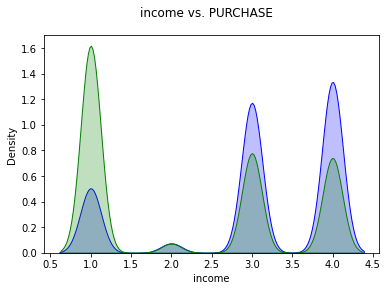

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["PURCHASE"]==1]["income"], shade=True, color="blue", label="PURCHASED", ax=ax)
sns.kdeplot(df[df["PURCHASE"]==0]["income"], shade=True, color="green", label="NOT PURCHASED", ax=ax)

ax.set_xlabel("income")
ax.set_ylabel("Density")

fig.suptitle("income vs. PURCHASE");

In [ ]:
df['STATE'] = df['STATE'].apply(lambda x: x.replace(" ","NA") if x==" " else x)

In [ ]:
df["STATE"].value_counts()

Maharashtra                    21968
Tamil Nadu                     17836
Uttar Pradesh                  16400
Karnataka                      11689
Gujarat                         7864
West Bengal                     7751
Telangana                       4783
Andhra Pradesh                  4781
Rajasthan                       4621
Kerala                          3718
Madhya Pradesh                  3680
Delhi                           3572
Bihar                           3225
Haryana                         3197
Punjab                          3113
Odisha                          2773
Assam                           2638
Chhattisgarh                    2366
Jharkhand                       2242
Uttarakhand                     1984
Jammu and Kashmir               1962
NA                              1842
Himachal Pradesh                1763
Tripura                         1735
Goa                             1735
Chandigarh                      1583
Puducherry                      1503
M

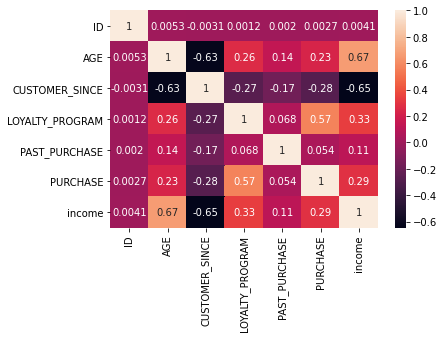

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
encoderincome = ce.OneHotEncoder(cols='INCOME_GROUP',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df_income = encoderincome.fit_transform(df["INCOME_GROUP"])
df_income["Purchase"] = df["PURCHASE"]
df_income.head(4)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,INCOME_GROUP_Low,INCOME_GROUP_High,INCOME_GROUP_Medium,INCOME_GROUP_,Purchase
0,1.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,0
2,0.0,1.0,0.0,0.0,1
3,1.0,0.0,0.0,0.0,1


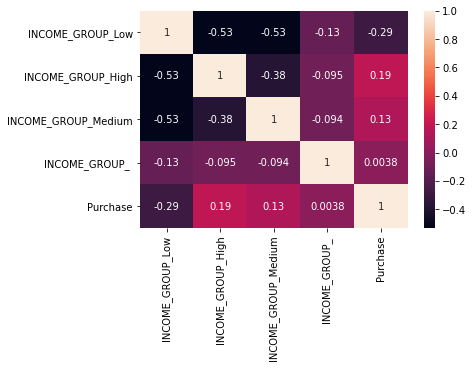

In [ ]:
sns.heatmap(df_income.corr(),annot=True)

In [ ]:
encoderstate=ce.OneHotEncoder(cols='STATE',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df_state = encoderstate.fit_transform(df["STATE"])
df_state.head(4)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,STATE_Uttar Pradesh,STATE_Madhya Pradesh,STATE_West Bengal,STATE_Tamil Nadu,STATE_Maharashtra,STATE_Kerala,STATE_Goa,STATE_Karnataka,STATE_Andhra Pradesh,STATE_Telangana,STATE_Chandigarh,STATE_Nagaland,STATE_Andaman and Nicobar Islands,STATE_Tripura,STATE_Delhi,STATE_Himachal Pradesh,STATE_NA,STATE_Puducherry,STATE_Sikkim,STATE_Gujarat,STATE_Odisha,STATE_Bihar,STATE_Punjab,STATE_Arunachal Pradesh,STATE_Haryana,STATE_Rajasthan,STATE_Uttarakhand,STATE_Jammu and Kashmir,STATE_Assam,STATE_Manipur,STATE_Mizoram,STATE_Jharkhand,STATE_Chhattisgarh,STATE_Meghalaya
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_state.shape

(150000, 34)

In [ ]:
df_state["Purchase"] = df["PURCHASE"]

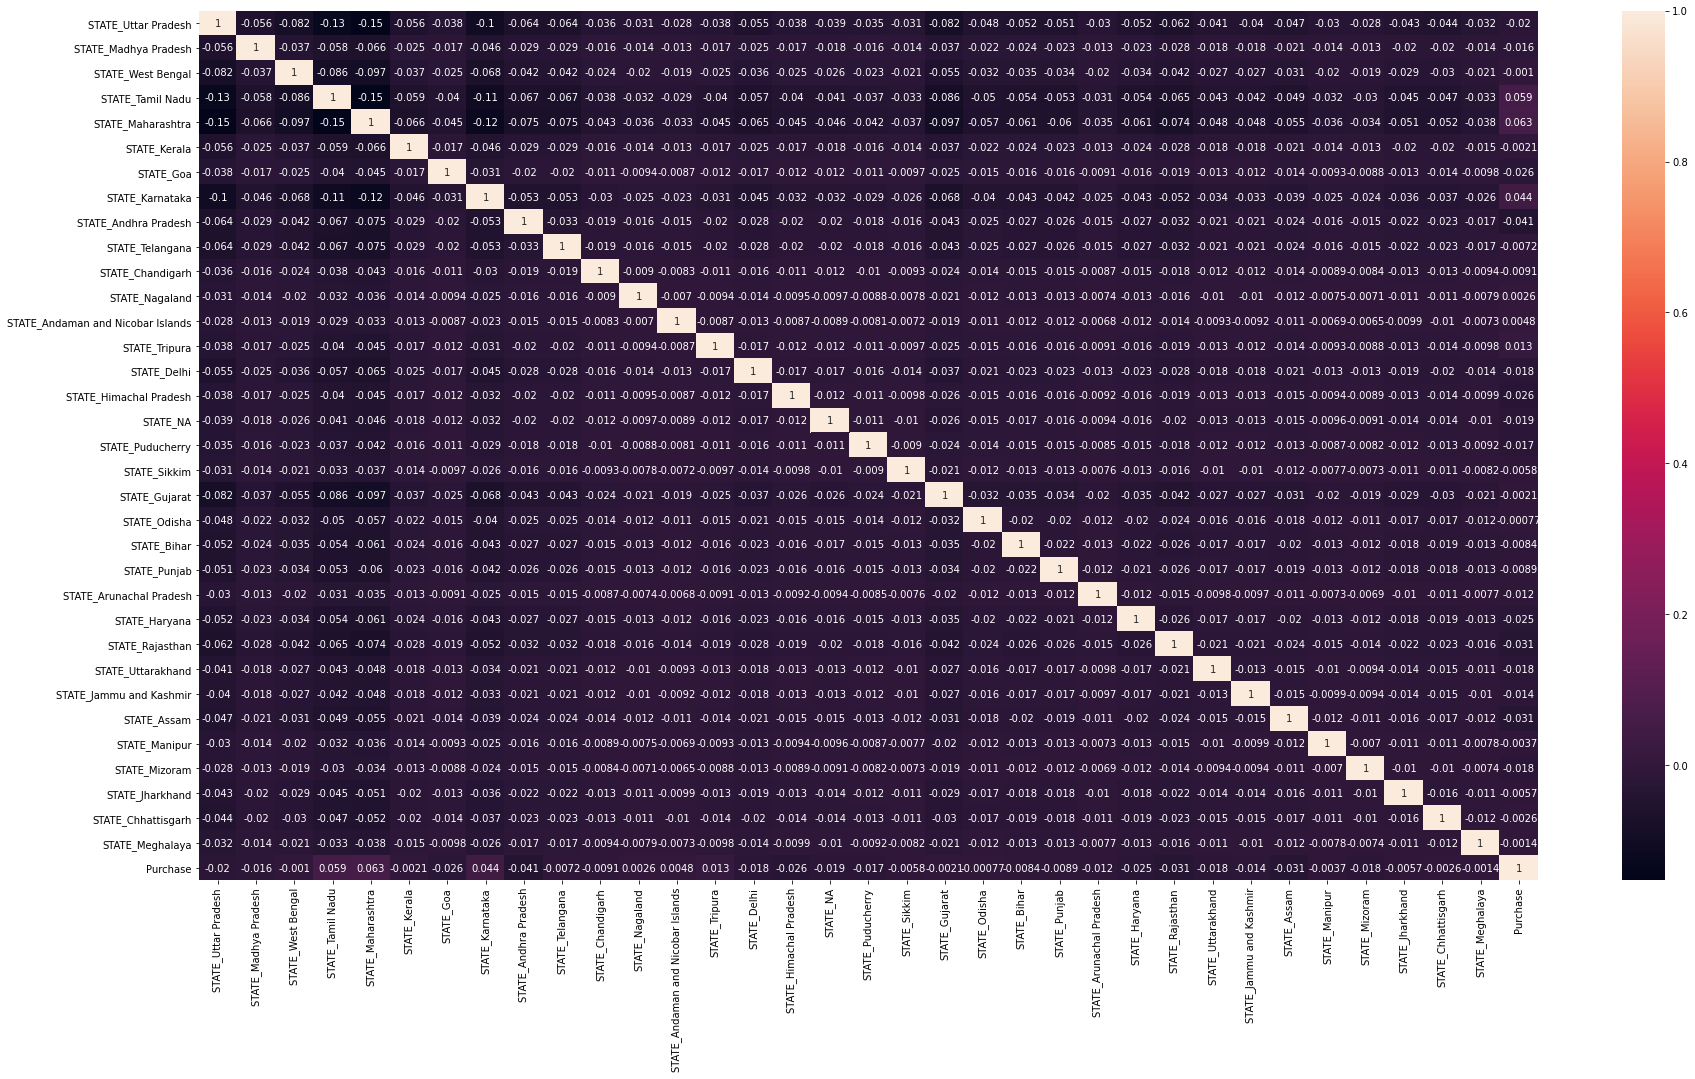

In [ ]:
plt.figure(figsize=(30,16))
sns.heatmap(df_state.corr(),annot=True)

In [ ]:
df['occupation'] = df['OCCUPATION'].apply(lambda x: x.replace(" ","NA") if x==" " else x)
df.head(4)

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE,income,occupation
0,1,Uttar Pradesh,28,,Low,10,1,4937,0,1,NA
1,2,Madhya Pradesh,27,Salaried,Low,10,1,10834,0,1,Salaried
2,3,West Bengal,62,,High,5,3,8610,1,4,NA
3,4,Tamil Nadu,27,Salaried,Low,10,1,14374,1,1,Salaried


In [ ]:
df["occupation"].value_counts()

Self employed    61375
Salaried         44214
NA               42777
Business          1634
Name: occupation, dtype: int64

In [ ]:
encoder_occ= ce.OrdinalEncoder(cols=['occupation'],return_df=True,
                           mapping=[{'col':'occupation',
'mapping':{'NA':1,'Self employed':2,'Salaried':3,'Business':4}}])
df["occupation"] = encoder_occ.fit_transform(df["occupation"])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


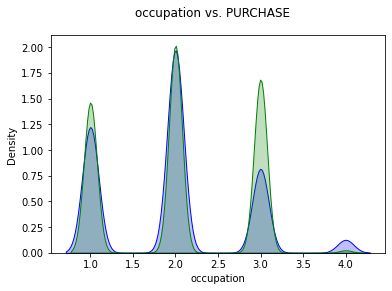

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["PURCHASE"]==1]["occupation"], shade=True, color="blue", label="PURCHASED", ax=ax)
sns.kdeplot(df[df["PURCHASE"]==0]["occupation"], shade=True, color="green", label="NOT PURCHASED", ax=ax)

ax.set_xlabel("occupation")
ax.set_ylabel("Density")

fig.suptitle("occupation vs. PURCHASE");

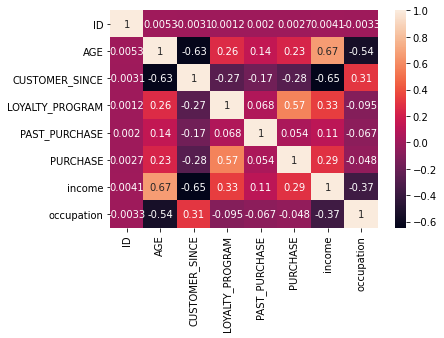

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
encoderocc = ce.OneHotEncoder(cols='OCCUPATION',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df_occ = encoderocc.fit_transform(df["OCCUPATION"])
df_occ["Purchase"] = df["PURCHASE"]
df_occ.head(4)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,OCCUPATION_,OCCUPATION_Salaried,OCCUPATION_Self employed,OCCUPATION_Business,Purchase
0,1.0,0.0,0.0,0.0,0
1,0.0,1.0,0.0,0.0,0
2,1.0,0.0,0.0,0.0,1
3,0.0,1.0,0.0,0.0,1


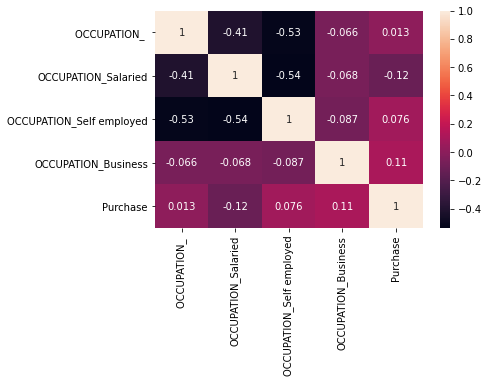

In [ ]:
sns.heatmap(df_occ.corr(),annot=True)